In [1]:
import sys
import os
sys.path.append(r"C:\\Users\\klayv\\Atlas\\atlas_eye")


import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

%matplotlib inline

from odin.enhancement.enhancer import ImageEnhancer
from odin.enhancement.metrics import Metrics
from odin.utilities.files_manager import FilesManager
from odin.base import CONFIG

In [2]:
def show_images(images):
    _, axes = plt.subplots(2, 3, figsize=(15, 6))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="gray")
        ax.set_title(f" {images[i].shape}")  # Set title as image path

        ax.axis("off")

    plt.tight_layout()
    plt.show()

['C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\raw\\sp_1.jpg', 'C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\raw\\sp_2.jpg', 'C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\raw\\sp_3.jpg', 'C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\raw\\sp_4.jpg', 'C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\raw\\sp_5.jpg', 'C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\raw\\sp_6.jpg']


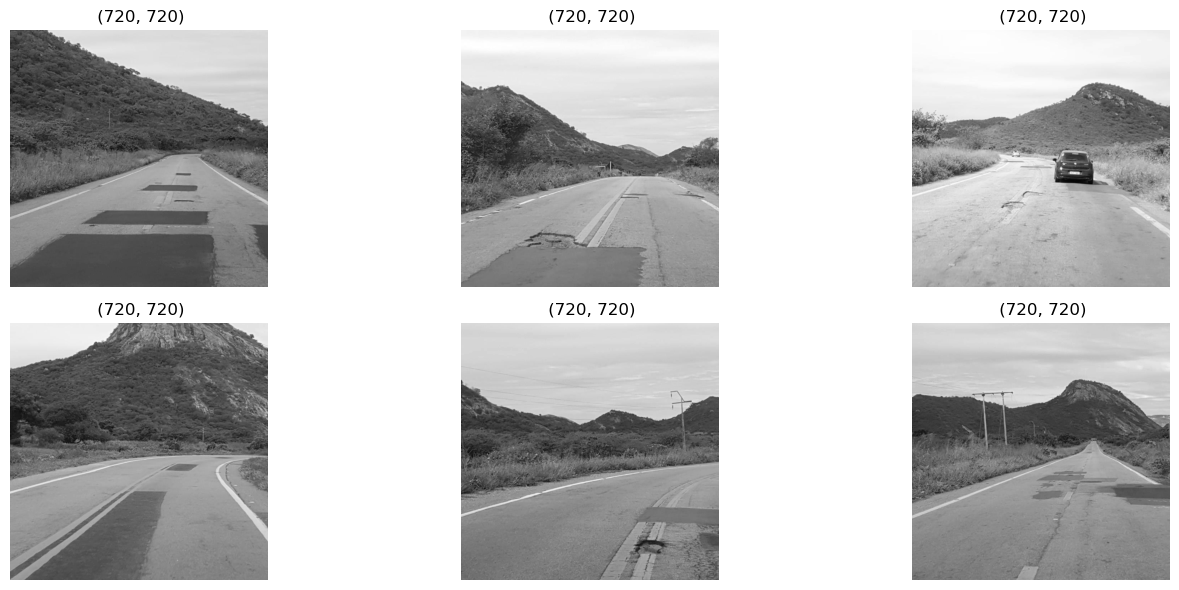

In [3]:
## Preparing

files = glob.glob(os.path.join(os.path.join(CONFIG.project.path , CONFIG.data.raw.path), f"*{'jpg'}"))
print(files)

images_gray_scales_arrays = [cv2.imread(image, cv2.IMREAD_GRAYSCALE) for image in files]
show_images(images_gray_scales_arrays)


### Histogram Equalization

Folder 'C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization' already exists.
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization\histogram_equalized_0.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization\histogram_equalized_1.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization\histogram_equalized_2.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization\histogram_equalized_3.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization\histogram_equalized_4.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\histogram_equalization\histogram_equalized_5.jpg


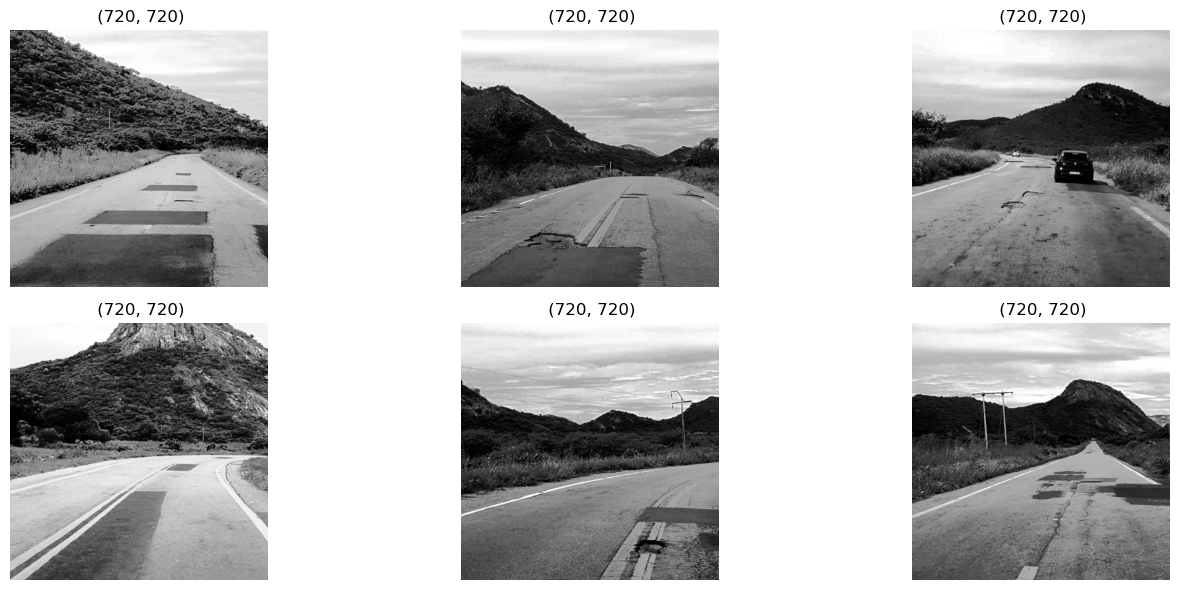

{'RMSE': 37.993638038635254,
 'AMBE': 33.70283762613932,
 'PSNR': 27.198855856186565,
 'SSIM': 0.7878351524221049}

In [4]:
histogram_equalization_enhanced_images_array_tuple = [(image, ImageEnhancer.histogram_equalization(image)) for image in images_gray_scales_arrays]
he_enhanced_images = [enhanced_image for original_img, enhanced_image in histogram_equalization_enhanced_images_array_tuple]

to_save_folder = "C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\processed\\histogram_equalization\\"
images_prefix = "histogram_equalized_"

equalization_enhanced = FilesManager.save_enhancedImages(he_enhanced_images, to_save_folder, images_prefix)
show_images(he_enhanced_images)


Metrics.average_metrics(histogram_equalization_enhanced_images_array_tuple)

### CLAHE

Folder 'C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe' already exists.
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe\clahe_enhanced_0.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe\clahe_enhanced_1.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe\clahe_enhanced_2.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe\clahe_enhanced_3.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe\clahe_enhanced_4.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\clahe\clahe_enhanced_5.jpg


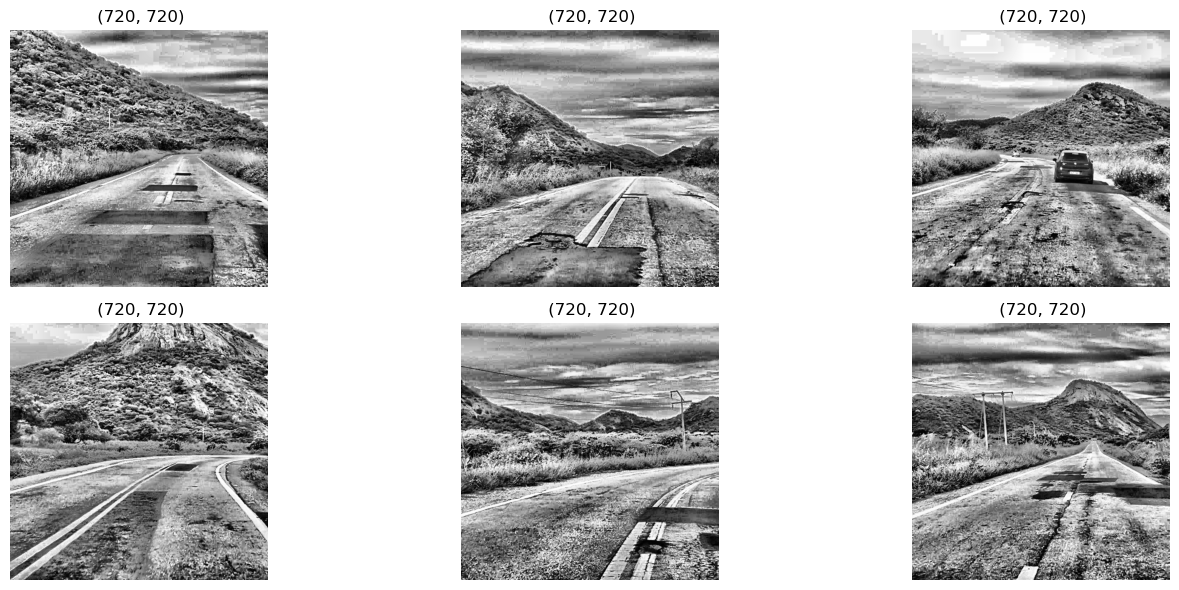

{'RMSE': 56.22977066040039,
 'AMBE': 45.21877098083496,
 'PSNR': 27.200519414355764,
 'SSIM': 0.4178673142119509}

In [5]:
CLAHE_enhanced_images_array = [(image, ImageEnhancer.CLAHE_contrast_limited_adaptative_histogram_equalization(image)) for image in images_gray_scales_arrays]
clahe_enhanced_images = [enhanced_image for original_img, enhanced_image in CLAHE_enhanced_images_array]

clahe_to_save_folder = "C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\processed\\clahe\\"
images_prefix = "clahe_enhanced_"

clahe_enhanced = FilesManager.save_enhancedImages(clahe_enhanced_images, clahe_to_save_folder, images_prefix)
show_images(clahe_enhanced_images)

Metrics.average_metrics(CLAHE_enhanced_images_array)

### Total Variance

Folder 'C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance' already exists.
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance\total_variance_0.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance\total_variance_1.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance\total_variance_2.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance\total_variance_3.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance\total_variance_4.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\total_variance\total_variance_5.jpg


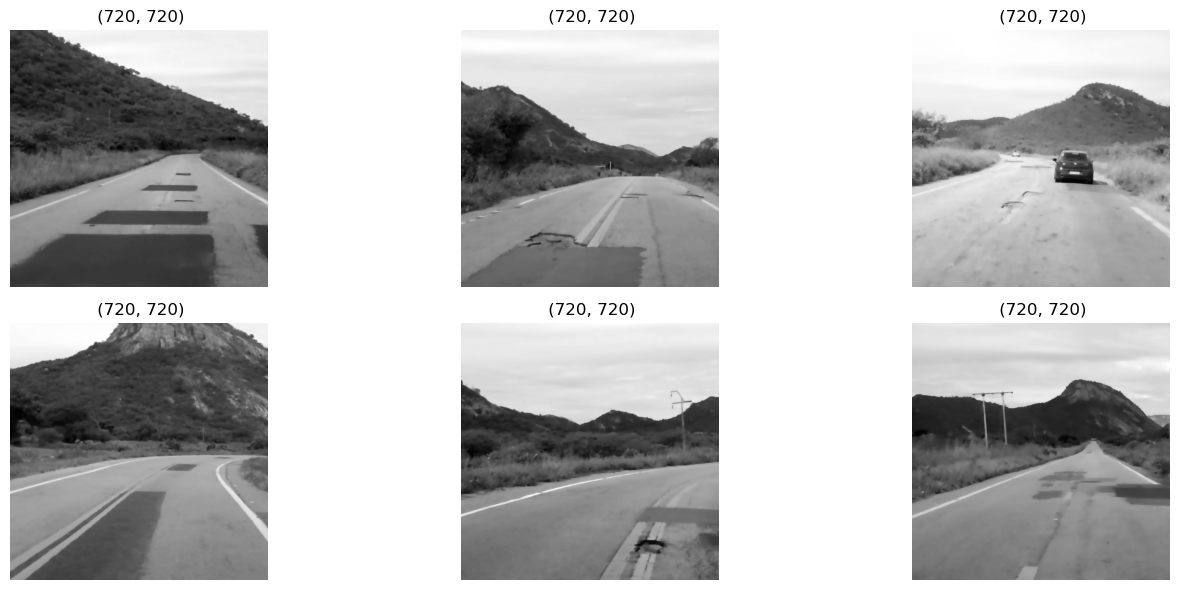

{'RMSE': 6.061071952184041,
 'AMBE': 3.7047263781229653,
 'PSNR': 33.784815581978144,
 'SSIM': 0.7841158655693992}

In [6]:
tv_enhanced_images_array = [(image, ImageEnhancer.total_variance_denoising(image)) for image in images_gray_scales_arrays]
tv_enhanced_images = [enhanced_image for original_img, enhanced_image in tv_enhanced_images_array]

tv_to_save_folder = "C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\processed\\total_variance\\"
images_prefix = "total_variance_"

tv_enhanced = FilesManager.save_enhancedImages(tv_enhanced_images, tv_to_save_folder, images_prefix)
show_images(tv_enhanced_images)

Metrics.average_metrics(tv_enhanced_images_array)

Folder 'C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter' created successfully.
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter\bilateral_filter0.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter\bilateral_filter1.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter\bilateral_filter2.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter\bilateral_filter3.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter\bilateral_filter4.jpg
Image saved C:\Users\klayv\Atlas\atlas_eye\data\processed\bilateral_filter\bilateral_filter5.jpg


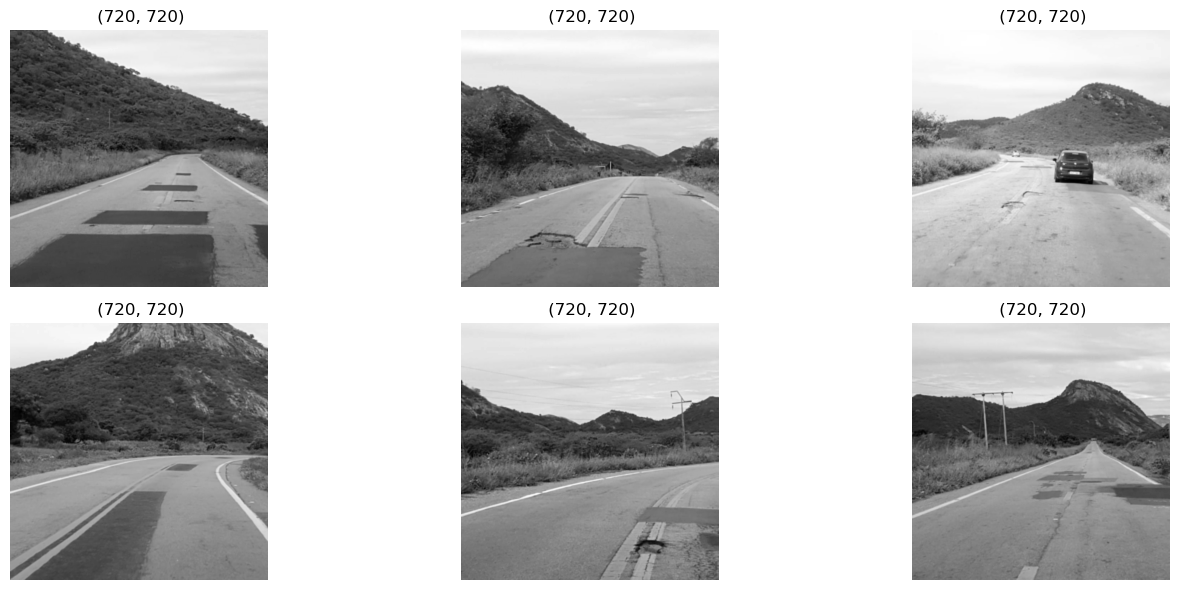

{'RMSE': 4.04612135887146,
 'AMBE': 2.3289682865142822,
 'PSNR': 36.34209856676291,
 'SSIM': 0.9212114564579306}

In [7]:
bilateral_filtering_enhanced_images_array = [(image, ImageEnhancer.bilateral_filter(image)) for image in images_gray_scales_arrays]
bilateral_filtering_enhanced_images = [enhanced_image for original_img, enhanced_image in bilateral_filtering_enhanced_images_array]

bilateral_filtering_to_save_folder = "C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\processed\\bilateral_filter\\"
images_prefix = "bilateral_filter"

bilateral_filtering_enhanced = FilesManager.save_enhancedImages(bilateral_filtering_enhanced_images, bilateral_filtering_to_save_folder, images_prefix)
show_images(bilateral_filtering_enhanced_images)

Metrics.average_metrics(bilateral_filtering_enhanced_images_array)

### LIME

In [ ]:
from odin.enhancement import lime_enhancer

lime_enhanced_images_array = [(image, lime_enhancer.low_light_image_enhancement(image)) for image in images_gray_scales_arrays]
bilateral_filtering_enhanced_images = [enhanced_image for original_img, enhanced_image in bilateral_filtering_enhanced_images_array]

bilateral_filtering_to_save_folder = "C:\\Users\\klayv\\Atlas\\atlas_eye\\data\\processed\\bilateral_filter\\"
images_prefix = "bilateral_filter"

bilateral_filtering_enhanced = FilesManager.save_enhancedImages(bilateral_filtering_enhanced_images, bilateral_filtering_to_save_folder, images_prefix)
show_images(bilateral_filtering_enhanced_images)

Metrics.average_metrics(bilateral_filtering_enhanced_images_array)